<a href="https://colab.research.google.com/github/chenxin199261/SCF-acceleration/blob/main/pyscf_denMat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyscf

     |████████████████████████████████| 29.7 MB 82 kB/s 




******** <class 'pyscf.scf.atom_hf.AtomSphericAverageRHF'> ********
method = AtomSphericAverageRHF-RHF
initial guess = minao
damping factor = 0
level_shift factor = 0
DIIS = <class 'pyscf.scf.diis.CDIIS'>
diis_start_cycle = 1
diis_space = 8
SCF conv_tol = 1e-09
SCF conv_tol_grad = None
SCF max_cycles = 50
direct_scf = True
direct_scf_tol = 1e-13
chkfile to save SCF result = /content/tmpjhm_pku2
max_memory 4000 MB (current use 260 MB)
Set gradient conv threshold to 3.16228e-05
init E= -74.256327328113
cycle= 1 E= -74.268790239725  delta_E= -0.0125  |g|=    0  |ddm|= 0.118
cycle= 2 E= -74.2691340437085  delta_E= -0.000344  |g|=    0  |ddm|= 0.0421
cycle= 3 E= -74.2691858596966  delta_E= -5.18e-05  |g|=    0  |ddm|= 0.01
cycle= 4 E= -74.2691871256342  delta_E= -1.27e-06  |g|=    0  |ddm|= 0.0026
cycle= 5 E= -74.2691871256343  delta_E= -9.95e-14  |g|=    0  |ddm|= 4.84e-07
Extra cycle  E= -74.2691871256343  delta_E= -1.42e-14  |g|=    0  |ddm|= 5.94e-08
converged SCF energy = -74.2691871

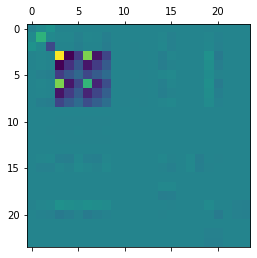

In [10]:
from pyscf import gto, dft
import matplotlib.pyplot as plt

mol = gto.M(
    atom = '''
O 0 0      0
H 0 -2.757 2.587
H 0  2.757 2.587''',
    basis = 'ccpvdz',
    charge = 0
)
mf = dft.RKS(mol)
mf.xc = 'camb3lyp'

dm1 = mf.init_guess_by_huckel(mol)
mf.kernel(dm0=dm1)
dm2 = mf.make_rdm1(mf.mo_coeff, mf.mo_occ)
plt.matshow(dm1-dm2)
plt.show()
